## EDA-STUDENTS PERFORMANCE IN EXAMS

### -Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

### -Load Dataset

In [4]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### -Add Average Score Column

In [8]:
df['avg_score'] = df[['math score','reading score','writing score']].mean(axis=1)

#### -To see the size of the dataset

In [22]:
print (df.shape)

(1000, 9)


#### -To see mean, median, mode etc

In [23]:
df.describe()

,math score,reading score,writing score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


#### -To see the column and data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


#### -To find the null/missing values

In [25]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
avg_score                      0
dtype: int64

#### -Count of students by Gender

In [26]:
print(df['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


#### Insight:
- Female: 518
- Male: 482

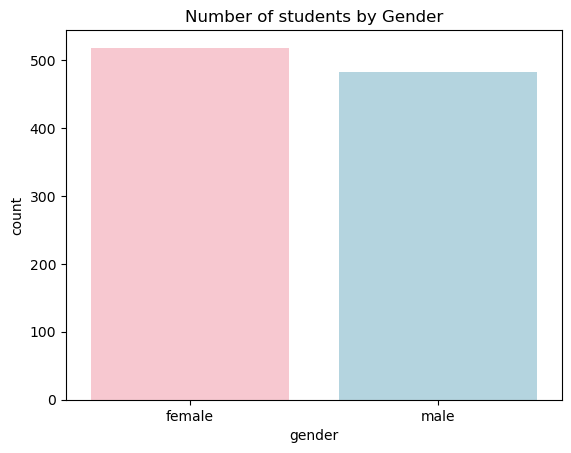

In [27]:
sns.countplot(x='gender',data=df,
              palette=['pink','lightblue'])
plt.title("Number of students by Gender")
plt.show()

#### Insight:
- Slightly more females than males.

#### -Average scores in math, reading and writing.

In [28]:
avg_scores=df[['math score','reading score','writing score']].mean()
print (avg_scores)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


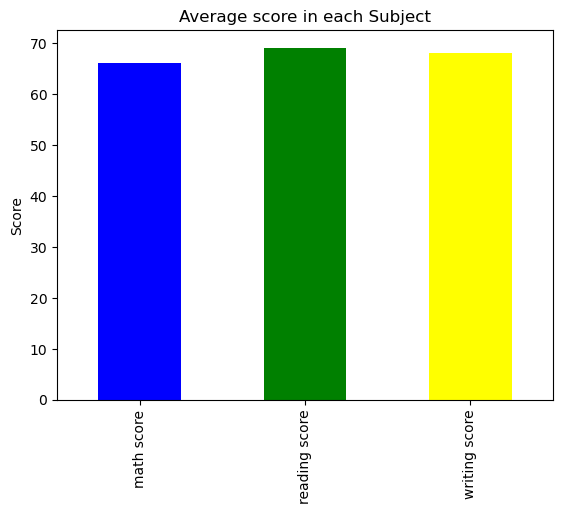

In [29]:
avg_scores.plot(kind='bar',
                color=['blue','green','yellow'])
plt.title('Average score in each Subject')
plt.ylabel('Score')
plt.show()

#### Insight:
- Students perform best in reading.

#### -Average scores by Gender

In [30]:
gender_scores = df.groupby('gender')[['math score','reading score','writing score']].mean()
print(gender_scores)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


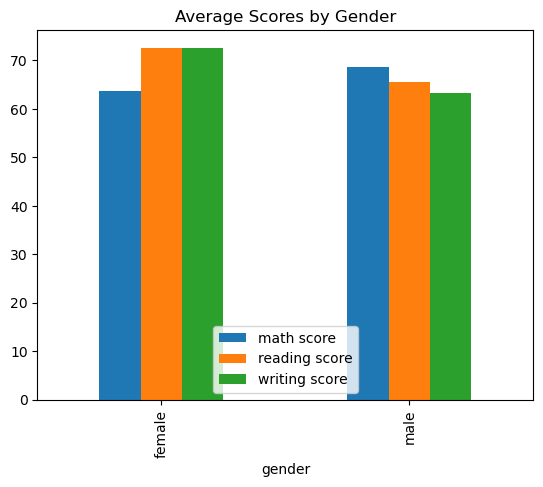

In [31]:
gender_scores.plot(kind='bar')
plt.title("Average Scores by Gender")
plt.show()

#### Insight:
- On average,Females perform better in reading and writing,while Males perform slightly better in math.

#### -Average scores by parental education

In [32]:
parent_scores = df.groupby('parental level of education')[['avg_score']].mean()
print(parent_scores)

                             avg_score
parental level of education           
associate's degree           69.569069
bachelor's degree            71.923729
high school                  63.096939
master's degree              73.598870
some college                 68.476401
some high school             65.108007


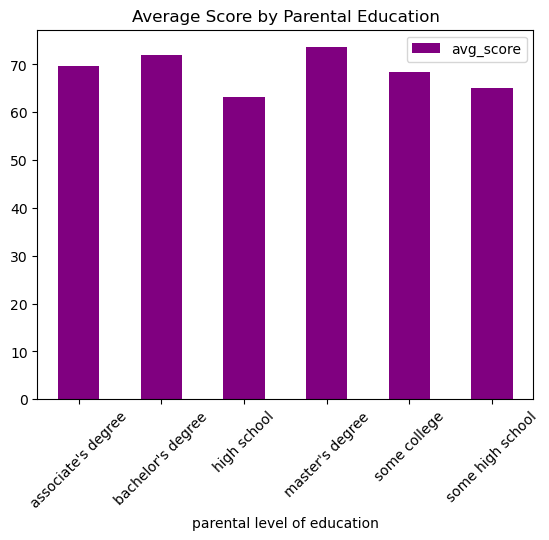

In [35]:
parent_scores.plot(kind='bar', color='purple')
plt.xticks(rotation=45)
plt.title("Average Score by Parental Education")
plt.show()

#### Insight:
- When parents are more educated ,their children usually score higher in exams.

#### -Distribution of Math Scores

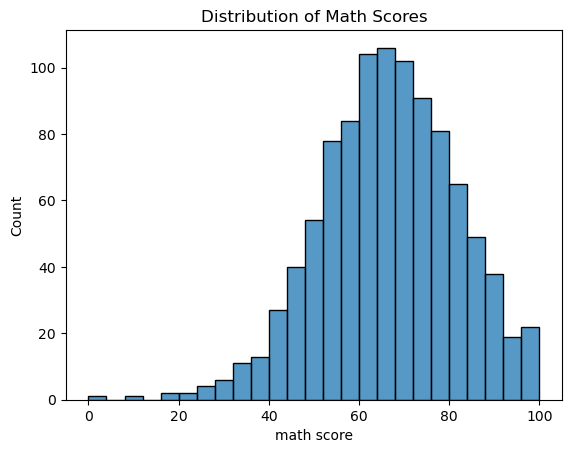

In [40]:
sns.histplot(df['math score'])
plt.title('Distribution of Math Scores')
plt.show()

#### Insight:
- Math scores are approximately normal, most students score between 60-80.

#### -Distribution of Reading Scores

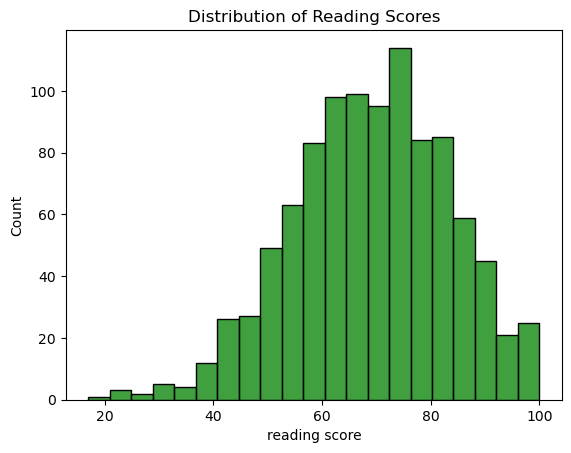

In [10]:
sns.histplot(df['reading score'],color='green')
plt.title('Distribution of Reading Scores')
plt.show()

#### Insight:
- Reading scores are slightly higher than Math on average.

#### -Distribution of Writing Scores

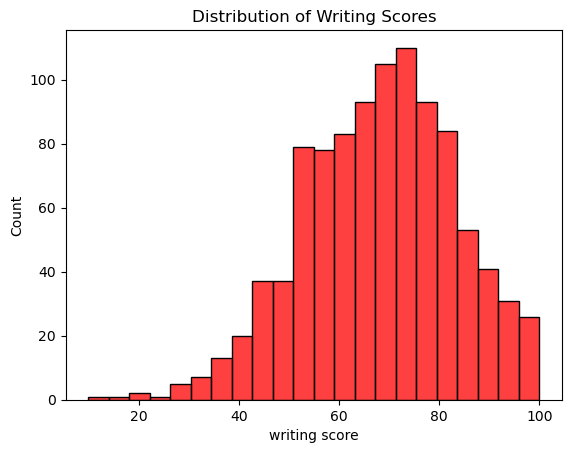

In [42]:
sns.histplot(df['writing score'],color='red')
plt.title('Distribution of Writing Scores')
plt.show()

#### Insight:
- Writing scores are slightly lower than Reading scores 

#### -Correlation between Math, Reading and Writing

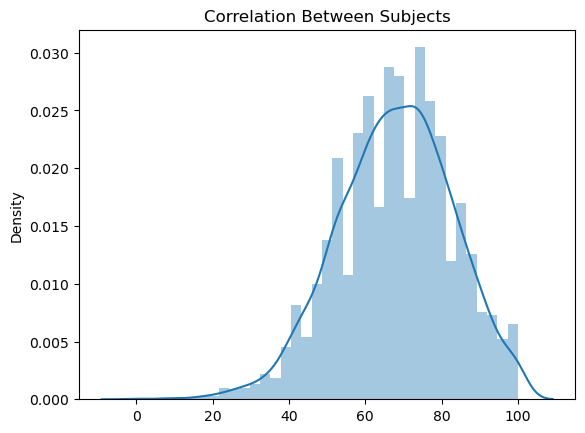

In [14]:
sns.distplot(df[['math score','reading score','writing score']])
plt.title('Correlation Between Subjects')
plt.show()

#### Insight:
- Shows a positive correlation.

#### -Math Score by Gender

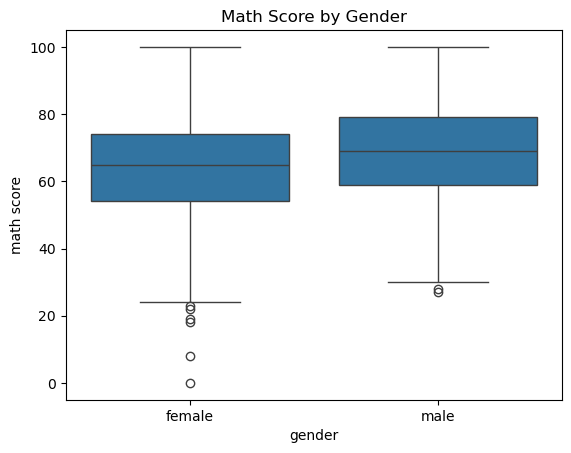

In [24]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.show()

#### Insight:
- Males and females perform similarly in Math, with males slightly higher in some cases.

#### -Reading Score by Gender

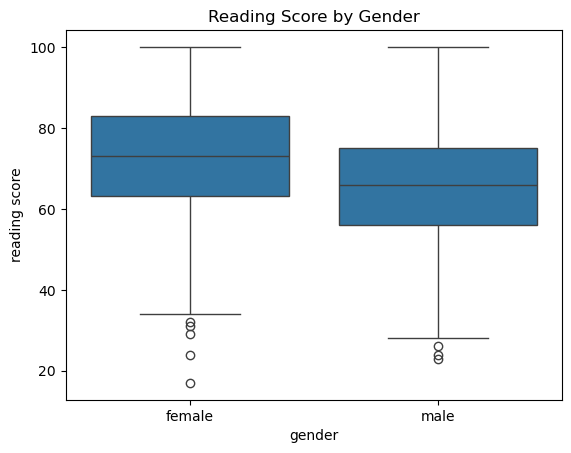

In [48]:
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Score by Gender')
plt.show()

#### Insight:
- Females have slightly higher scores in Reading.

#### -Writing Score by Gender

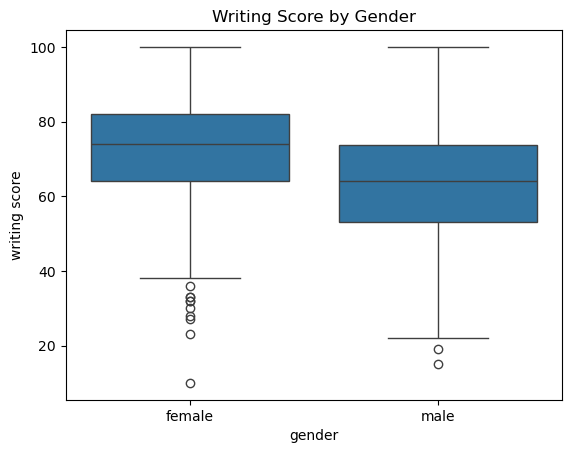

In [49]:
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Score by Gender')
plt.show()

#### Insight:
-Females generally have higher Writing scores.

#### -Effect of Test Preparation on Math Score

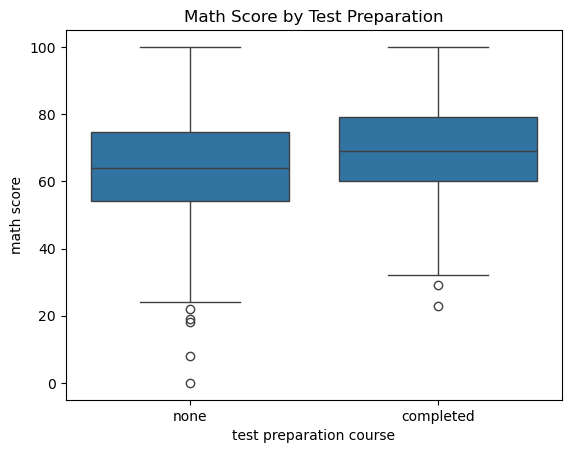

In [50]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score by Test Preparation')
plt.show()

#### Insight:
-Students who completed test preparation course scored higher in Math.

#### -Effect of Test Preparation on Reading Score

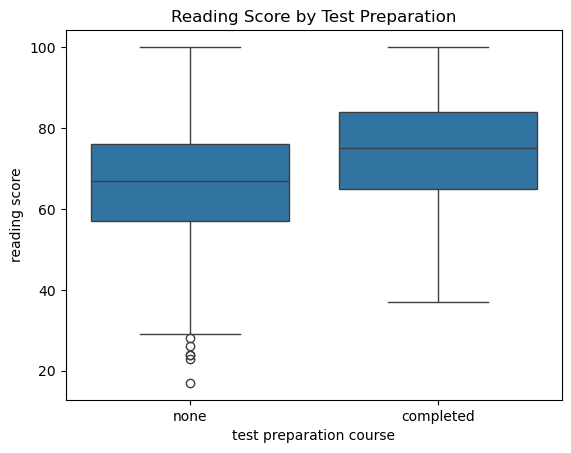

In [52]:
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading Score by Test Preparation')
plt.show()

#### Insight:
-Preparation positively impacts Reading scores.

#### -Effect of Test Preparation on Writing Score

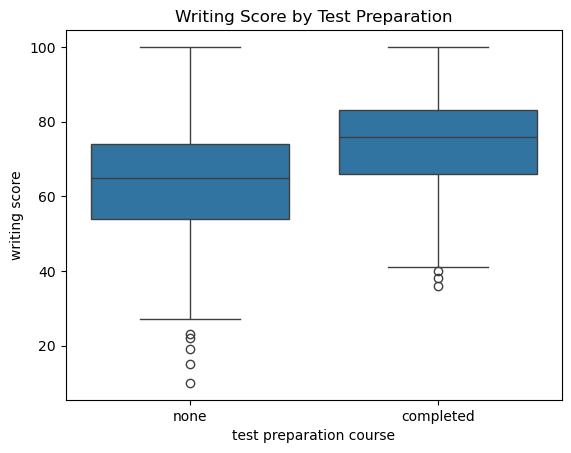

In [53]:
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing Score by Test Preparation')
plt.show()

#### Insight:
-Test preparation improves Writing scores too.

#### -Parental Level of Education vs Math Score

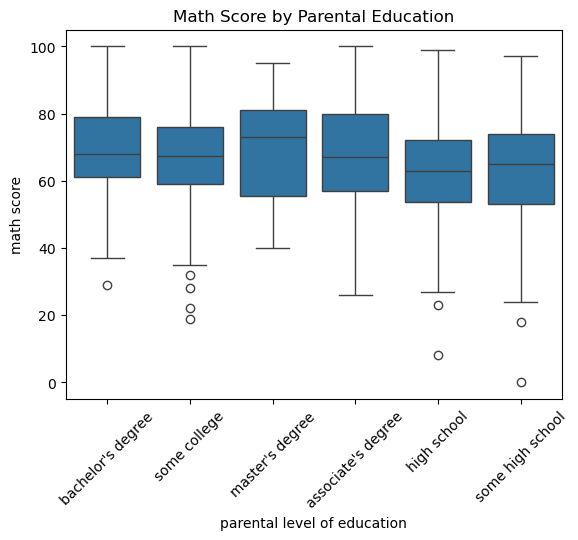

In [54]:
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education')
plt.show()

#### Insight:
-Higher parental education correlates with higher student scores.

#### -Parental Level of Education vs Reading Score

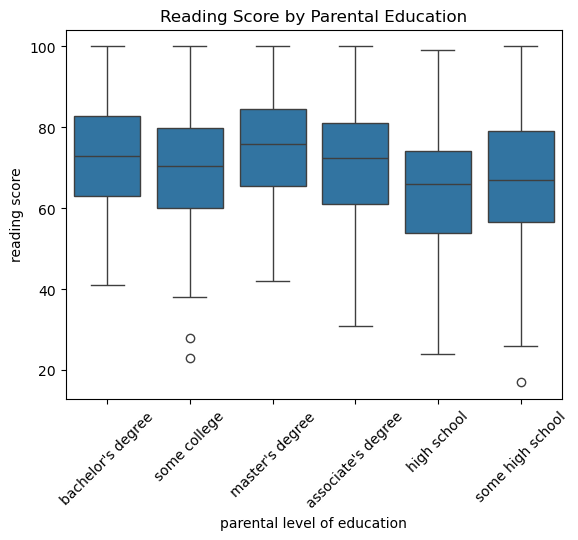

In [55]:
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.xticks(rotation=45)
plt.title('Reading Score by Parental Education')
plt.show()

#### Insight:
-Reading scores are higher when parents have higher education levels.

#### -Parental Level of Education vs Writing Score

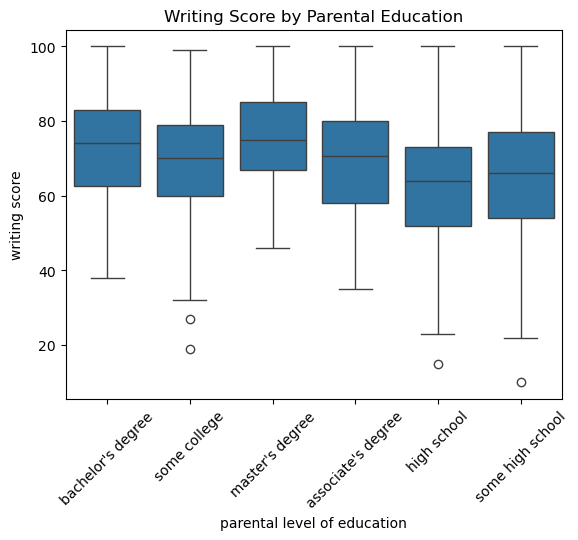

In [56]:
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.xticks(rotation=45)
plt.title('Writing Score by Parental Education')
plt.show()

#### Insight:
-Same for Writing scores - parental education positively impacts the performance.

#### -Distribution of lunch type among students

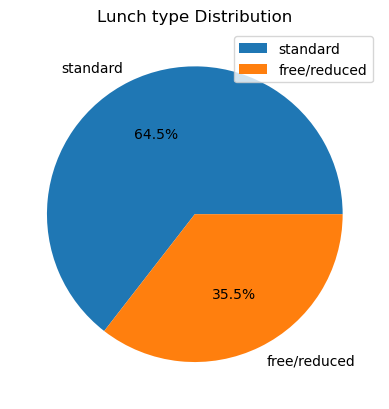

In [6]:
df['lunch'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Lunch type Distribution')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

#### Insight:
- Majority of students have 'Standard' lunch.

#### -Count of each race/ethnicity group

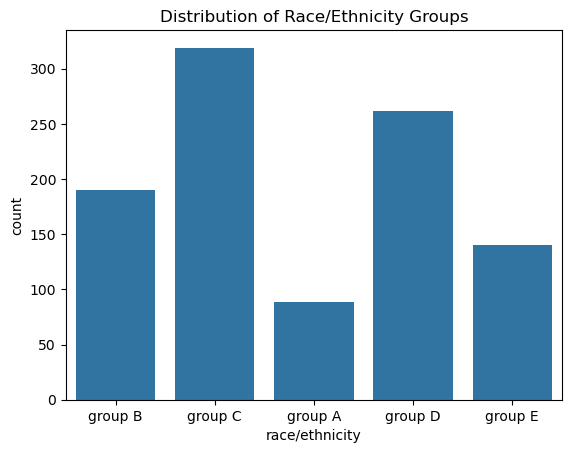

In [20]:
sns.countplot(x='race/ethnicity',data=df)
plt.title('Distribution of Race/Ethnicity Groups')
plt.show()

#### Insight:
- Group C has the most students and Group A has the fewest students- showing uneven distribution among race/ethnicity